### Import Data

Importing train.json as a DataFrame


In [1]:
import pandas as pd
df = pd.read_json('data/train.json')
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


### Data Cleaning

In [2]:
import pandas as pd
import unicodedata
import numpy as np
import re


def norm_special(df, keepRegion):
    ingredient_map = {}
    for i in df.iterrows():
        ingredient_map.update({x: unicodedata.normalize('NFD', x).encode('ascii', 'ignore').decode("utf-8").lower()
                               for x in i[1]['ingredients']})
    filt2 = [x for x in ingredient_map if len(x.split(' ')) > 2 and any(y == y.upper() and y.isalpha() for y in x)]
    ingredient_map['Johnsonville Andouille Dinner Sausage'] = 'sausage'
    ingredient_map['Oscar Mayer Deli Fresh Smoked Ham'] = 'ham'
    ingredient_map['Mexican cheese blend'] = 'mexican cheese'
    ingredient_map['grated GruyÃ¨re cheese'] = 'gruyere cheese'
    ingredient_map['shredded Monterey Jack cheese'] = 'monterey jack cheese'
    ingredient_map['Old El Paso Flour Tortillas'] = 'tortilla'
    ingredient_map['Philadelphia Cream Cheese'] = 'cream cheese'
    ingredient_map['Franks Hot Sauce'] = 'hot sauce'
    ingredient_map['BertolliÂ® Classico Olive Oil'] = 'olive oil'
    ingredient_map['Old El Pasoâ„¢ mild red enchilada sauce'] = 'red enchilada sauce'
    ingredient_map['Pillsburyâ„¢ Refrigerated Crescent Dinner Rolls'] = 'crescent'
    ingredient_map['SargentoÂ® Traditional Cut Shredded Mozzarella Cheese'] = 'mozzarella cheese'
    ingredient_map['McCormick Parsley Flakes'] = 'parsley flake'
    ingredient_map['Crystal Farms Butter'] = 'butter'
    ingredient_map['Crystal Farms Shredded Gouda Cheese'] = 'gouda cheese'
    ingredient_map['Oscar Mayer Bacon'] = 'bacon'
    ingredient_map['Campbell\'s Condensed Tomato Soup'] = 'tomato soup'
    ingredient_map['Hellmann"s Light Mayonnaise'] = 'mayonnaise'
    ingredient_map['Kraft Grated Parmesan Cheese'] = 'parmesan cheese'
    ingredient_map['hatch green chiles'] = 'green chili'
    ingredient_map['Jell-O Gelatin Dessert'] = 'gelatin'
    ingredient_map['Hurst Family Harvest Chipotle Lime Black Bean Soup mix'] = 'chipotle lime black bean soup'
    ingredient_map["Campbell's Condensed Cream of Chicken Soup"] = "cream of chicken soup"
    ingredient_map['Pace Picante Sauce'] = 'picante sauce'
    ingredient_map['Crystal Hot Sauce'] = 'hot sauce'
    ingredient_map['Chinese egg noodles'] = 'egg noodle'
    ingredient_map['Country CrockÂ® Spread'] = 'butter spread'
    ingredient_map['Progresso Black Beans'] = 'black bean'
    ingredient_map['Old El Pasoâ„¢ chopped green chiles'] = 'green chili'
    ingredient_map['Wish-Bone Italian Dressing'] = 'italian dressing'
    ingredient_map['Splenda Brown Sugar Blend'] = 'brown sugar'
    ingredient_map['KnorrÂ® Beef Bouillon'] = 'beef bouillon'
    ingredient_map['Neapolitan ice cream'] = 'ice cream'
    ingredient_map["I Can't Believe It's Not Butter!Â® Spread"] = 'margarine'
    ingredient_map['St Germain Liqueur'] = 'elderflower liqeur'
    ingredient_map['Zatarainâ€™s Jambalaya Mix'] = 'jambalaya mix'
    ingredient_map['Argo Corn Starch'] = 'corn starch'
    ingredient_map['Old El Pasoâ„¢ taco seasoning mix'] = 'seasoning'
    ingredient_map["Campbell's Condensed Cheddar Cheese Soup"] = 'cheddar soup'
    ingredient_map['Pace Chunky Salsa'] = 'salsa'
    ingredient_map["Hellmann'sÂ® Real Mayonnaise"] = 'mayonnaise'
    ingredient_map['Skippy Creamy Peanut Butter'] = 'peanut butter'
    ingredient_map['BACARDIÂ® Mixers Margarita Mix'] = 'margarita mix'
    ingredient_map["Uncle Ben's Original Converted Brand rice"] = 'rice'
    ingredient_map['Bragg Liquid Aminos'] = 'liquid aminos'
    ingredient_map['KNUDSEN 2% Milkfat Low Fat Cottage Cheese'] = 'cottage cheese'
    ingredient_map['KRAFT Reduced Fat Shredded Mozzarella Cheese'] = 'mozzarella cheese'
    ingredient_map['Baileys Irish Cream Liqueur'] = 'irish cream liqeur'
    ingredient_map['Kerrygold Pure Irish Butter'] = 'butter'
    ingredient_map['BertolliÂ® Alfredo Sauce'] = 'vanilla extract'
    ingredient_map['McCormickÂ® Pure Vanilla Extract'] = 'vanilla extract'
    ingredient_map['Kraft Sun Dried Tomato Vinaigrette'] = 'vinaigrette'
    ingredient_map['Italian turkey sausage'] = 'sausage'
    ingredient_map['Hidden ValleyÂ® Original RanchÂ® Dips Mix'] = 'ranch dip'
    ingredient_map['Domino Light Brown Sugar'] = 'brown sugar'
    ingredient_map['Best FoodsÂ® Real Mayonnaise'] = 'mayonnaise'
    ingredient_map['Red GoldÂ® diced tomatoes'] = 'tomato'
    ingredient_map['Gourmet Garden garlic paste'] = 'garlic paste'
    ingredient_map['Gourmet Garden Oregano'] = 'oregano'
    ingredient_map['Pompeian Canola Oil and Extra Virgin Olive Oil'] = 'olive oil'
    ingredient_map['Swanson Chicken Broth'] = 'chicken broth'
    ingredient_map['McCormick Ground Ginger'] = 'ginger'
    ingredient_map['Philadelphia Cooking Creme'] = 'cream'
    ingredient_map['Old El Paso Taco Seasoning Mix'] = 'seasoning'
    ingredient_map['Crystal FarmsÂ® Shredded Cheddar Cheese'] = 'cheddar cheese'
    ingredient_map["JOHNSONVILLEÂ® Hot 'N Spicy Brats"] = 'sausage'
    ingredient_map['Barilla Oven-Ready Lasagne'] = 'lasagne'
    ingredient_map['Betty Crockerâ„¢ oatmeal cookie mix'] = 'oatmeal cookie mix'
    ingredient_map['YoplaitÂ® Greek 100 blackberry pie yogurt'] = 'yoghurt'
    ingredient_map['KRAFT Mexican Style Finely Shredded Four Cheese'] = 'cheese'
    ingredient_map['whole grain English muffins'] = 'muffin'
    ingredient_map['Hidden ValleyÂ® Original RanchÂ® Dressing'] = 'ranch dressing'
    ingredient_map["I Can't Believe It's Not Butter!Â® All Purpose Sticks"] = "margarine"
    ingredient_map['Adobo All Purpose Seasoning'] = 'seasoning'
    ingredient_map["Campbell's Condensed Cream of Mushroom up"] = "cream of mushroom"
    ingredient_map['McCormick Poppy Seed'] = 'poppy seed'
    ingredient_map['McCormick Ground White Pepper'] = 'pepper'
    ingredient_map['Hidden ValleyÂ® Original RanchÂ® Spicy Ranch Dressing'] = 'salad dressing'
    ingredient_map['CURRY GUY Smoked Spicy Salt'] = 'salt'
    ingredient_map['Johnsonville Smoked Sausage'] = 'sausage'
    ingredient_map['Knudsen Light Sour Cream'] = 'sour cream'
    ingredient_map['Alaskan king crab legs'] = 'alaskan king crab'
    ingredient_map['Estancia Pinot Noir'] = 'pinot noir'
    ingredient_map['Massaman curry paste'] = 'curry paste'
    ingredient_map['aged Manchego cheese'] = 'manchego cheese'
    ingredient_map['Heinz Chili Sauce'] = 'chili sauce'
    ingredient_map['Lea & Perrins Worcestershire Sauce'] = 'worcestershire sauce'
    ingredient_map['Hidden ValleyÂ® Original Ranch SaladÂ® Dressing & Seasoning Mix'] = 'salad dressing'
    ingredient_map['Conimex Wok Olie'] = 'oil'
    ingredient_map['Conimex Woksaus Specials Vietnamese Gember Knoflook'] = 'sauce'
    ingredient_map['Bisquick Baking Mix'] = 'baking mix'
    ingredient_map["Old El Pasoâ„¢ Thick 'n Chunky salsa"] = "salsa"
    ingredient_map['Velveeta Cheese Spread'] = 'cheese spread'
    ingredient_map['DeLallo Extra Virgin Olive Oil'] = 'olive oil'
    ingredient_map['Johnsonville Hot & Spicy Breakfast Links'] = 'sausage'
    ingredient_map["Best Food's Mayonnaise with Lime Juice"] = "mayonnaise"
    ingredient_map['Godiva Chocolate Liqueur'] = 'chocolate liqueur'
    ingredient_map['KnorrÂ® Pasta Sidesâ„¢ - Alfredo'] = 'alfredo sauce'
    ingredient_map['Johnsonville Andouille Fully Cooked Sausage'] = 'sausage'
    ingredient_map['Klondike Rose red skin potato'] = 'potato'
    ingredient_map['Herdez Salsa Verde'] = 'salsa'
    ingredient_map['Herdez Salsa Casera'] = 'salsa'
    ingredient_map['Knorr Chicken Stock Pots'] = 'chicken stock'
    ingredient_map['Swanson Vegetable Broth'] = 'vegetable broth'
    ingredient_map['Robert Mondavi Fume Blanc'] = 'fume blanc'
    ingredient_map['Land O LakesÂ® Butter'] = 'butter'
    ingredient_map['Cavenders Greek Seasoning'] = 'greek seasoning'
    ingredient_map['Meyer lemon juice'] = 'lemon juice'
    ingredient_map['Ortega Tostada Shells'] = 'tortilla'
    ingredient_map['KnorrÂ® Fiesta Sides Spanish Rice'] = 'rice'
    ingredient_map['Mizkan Oigatsuo Tsuyu Soup Base'] = 'soup base'
    ingredient_map['Elmlea Single Light'] = 'cream'
    ingredient_map['Nestle Table Cream'] = 'table cream'
    ingredient_map['Progressoâ„¢ Chicken Broth'] = 'chicken broth'
    ingredient_map['Mazola Corn Oil'] = 'corn oil'
    ingredient_map['BertolliÂ® Arrabbiata Sauce'] = 'arrabbiata sauce'
    ingredient_map['Old El Paso Enchilada Sauce'] = 'enchilada sauce'
    ingredient_map['Philadelphia Light Cream Cheese'] = 'cream cheese'
    ingredient_map['San Marzano Diced Tomatoes'] = 'tomatoes'
    ingredient_map['Bertolli Garlic Alfredo Sauce'] = 'alfredo sauce'
    ingredient_map['Daisy Sour Cream'] = 'sour cream'
    ingredient_map['Martha White Cornbread Mix'] = 'cornbread mix'
    ingredient_map['Southern Comfort Liqueur'] = 'liqueur'
    ingredient_map['Crispy Rice Cereal'] = 'cereal'
    ingredient_map['Kraft Miracle Whip Dressing'] = 'salad dressing'
    ingredient_map['Tyson Crispy Chicken Strips'] = 'chicken'
    ingredient_map['Tapatio Hot Sauce'] = 'hot sauce'
    ingredient_map['Knorr Chicken Flavor Bouillon'] = 'chicken flavoring'
    ingredient_map['Meyer lemon peel'] = 'lemon peel'
    ingredient_map["BREAKSTONE'S Sour Cream"] = "sour cream"
    ingredient_map['Mizkan Rice Vinegar'] = 'rice vinegar'
    ingredient_map['Mission Yellow Corn Tortillas'] = 'tortilla'
    ingredient_map['pitted Medjool dates'] = 'medjool date'
    ingredient_map['San Marzano Crushed Tomatoes'] = 'tomato'
    ingredient_map['Saffron Road Vegetable Broth'] = 'vegetable broth'
    ingredient_map['Kikkoman Soy Sauce'] = 'soy sauce'
    ingredient_map['Jameson Irish Whiskey'] = 'whiskey'
    ingredient_map['Velveeta Queso Blanco'] = 'white cheese dip'
    ingredient_map['KnorrÂ® Vegetable recipe mix'] = 'vegetable mix'
    ingredient_map['Spice Islands Bay Leaves'] = 'bay leaves'
    ingredient_map['MazolaÂ® Chicken Flavor Bouillon Powder'] = 'chicken flavoring'
    ingredient_map['Spice Islands Oregano'] = 'oregano'
    ingredient_map['Japanese mountain yam'] = 'yam'
    ingredient_map['KRAFT Shredded Pepper Jack Cheese with a TOUCH OF PHILADELPHIA'] = 'pepper jack cheese'
    ingredient_map['Heinz Tomato Ketchup'] = 'tomato ketchup'
    ingredient_map['Taco Bell Taco Seasoning Mix'] = 'seasoning'
    ingredient_map['Pam No-Stick Cooking Spray'] = 'cooking spray'
    ingredient_map['Jimmy Dean Pork Sausage'] = 'sausage'
    ingredient_map['LiptonÂ® Recipe SecretsÂ® Onion Soup Mix'] = 'onion soup mix'
    ingredient_map['sparkling rosÃ© wine'] = 'rose wine'
    ingredient_map['Kraft Sharp Cheddar Cheese'] = 'cheddar cheese'
    ingredient_map['Cholula Hot Sauce'] = 'hot sauce'
    ingredient_map["Quorn Chik''n Tenders"] = "chicken tender"
    ingredient_map['Jiffy Corn Muffin Mix'] = 'corn muffin mix'
    ingredient_map['English toffee bits'] = 'toffee'
    ingredient_map['vegan Worcestershire sauce'] = 'worcestershire sauce'
    ingredient_map['Green Giantâ„¢ sliced mushrooms'] = 'mushroom'
    ingredient_map['Mae Ploy Sweet Chili Sauce'] = 'sweet chili sauce'
    ingredient_map['Gold Medal Flour'] = 'flour'
    ingredient_map['Royal Baking Powder'] = 'baking powder'
    ingredient_map['Ragu Golden Veggie Fettuccine Pasta'] = 'fettuccine'
    ingredient_map['Ragu Classic Alfredo Sauce'] = 'alfredo sauce'
    ingredient_map['Knorr Chicken Stock Cubes'] = 'chicken stock'
    ingredient_map['KRAFT Shredded Cheddar Cheese'] = 'cheddar cheese'
    ingredient_map['Breakstoneâ€™s Sour Cream'] = 'sour cream'
    ingredient_map['Jif Creamy Peanut Butter'] = 'peanut butter'
    ingredient_map['Mazola Canola Oil'] = 'canola oil'
    ingredient_map['Texas Pete Hot Sauce'] = 'hot sauce'
    ingredient_map['SYD Hot Rub'] = 'barbecue sauce'
    ingredient_map['YoplaitÂ® Greek 2% caramel yogurt'] = 'greek yogurt'
    ingredient_map['Lipton Sparkling Diet Green Tea with Strawberry Kiwi'] = 'green tea'
    ingredient_map['New York Style PanetiniÂ® toasts'] = 'toast'
    ingredient_map['Cara Cara orange'] = 'orange'
    ingredient_map['Bengali 5 Spice'] = 'five spice'
    ingredient_map['RaguÂ® Robusto!Â® Pasta Sauce'] = 'pasta sauce'
    ingredient_map['Kroger Black Beans'] = 'black beans'
    ingredient_map['Jasmine brown rice'] = 'rice'
    ingredient_map["Frank'sÂ® RedHotÂ® Original Cayenne Pepper Sauce"] = "cayenne pepper sauce"
    ingredient_map['Knox unflavored gelatin'] = 'gelatin'
    ingredient_map['Texas toast bread'] = 'toast'
    ingredient_map['Jose Cuervo Gold Tequila'] = 'tequila'
    ingredient_map['Imperial Sugar Light Brown Sugar'] = 'sugar'
    ingredient_map['Crisco Pure Canola Oil'] = 'canola oil'
    ingredient_map['Earth Balance Natural Buttery Spread'] = 'butter'
    ingredient_map['Gold Medal All Purpose Flour'] = 'flour'
    ingredient_map['Rice Krispies Cereal'] = 'cereal'
    ingredient_map['BreyersÂ® Natural Vanilla Ice Cream'] = 'ice cream'
    ingredient_map['Rotel Diced Tomatoes & Green Chilies'] = 'green chili'
    ingredient_map['Earth Balance Buttery Spread'] = 'butter'
    ingredient_map['Diamond CrystalÂ® Kosher Salt'] = 'salt'
    ingredient_map['Old El Pasoâ„¢ refried beans'] = 'bean'
    ingredient_map['Jimmy Dean All Natural Regular Pork Sausage'] = 'sausage'
    ingredient_map['JOHNSONVILLE Hot & Spicy Sausage Slices'] = 'sausage'
    ingredient_map['Soy VayÂ® Toasted Sesame Dressing & Marinade'] = 'sesame dressing'
    ingredient_map['Soy VayÂ® Veri Veri TeriyakiÂ® Marinade & Sauce'] = 'teriyaki sauce'
    ingredient_map['Tuttorosso Diced Tomatoes'] = 'tomato'
    ingredient_map['Domino Confectioners Sugar'] = 'sugar'
    ingredient_map['Bisquick Original All-Purpose Baking Mix'] = 'baking mix'
    ingredient_map['Alexia Waffle Fries'] = 'waffle fries'
    ingredient_map['Tipo 00 flour'] = 'flour'
    ingredient_map['San Marzano tomatoes'] = 'tomato'
    ingredient_map['Spanish smoked paprika'] = 'paprika'
    ingredient_map['Minute White Rice'] = 'rice'
    ingredient_map["Uncle Ben's Ready Rice Whole Grain Brown Rice"] = "rice"
    ingredient_map['TABASCOÂ® Chipotle Pepper Sauce'] = 'chipotle sauce'
    ingredient_map['Greek black olives'] = 'olive'
    ingredient_map['TruvÃ\xadaÂ® natural sweetener'] = 'sweetener'
    ingredient_map['Ro-Tel Diced Tomatoes & Green Chilies'] = 'green chili'
    ingredient_map['Pillsburyâ„¢ Crescent Recipe CreationsÂ® refrigerated seamless dough sheet'] = 'dough sheet'
    ingredient_map['low-fat crÃ¨me fraÃ®che'] = 'sour cream'
    ingredient_map['Karo Corn Syrup'] = 'corn syrup'
    ingredient_map['Fisher Pecan Halves'] = 'pecan'
    ingredient_map['Azteca Flour Tortillas'] = 'tortilla'
    ingredient_map['KRAFT Original Barbecue Sauce'] = 'barbecue sauce'
    ingredient_map['Wolf Brand Chili'] = 'chili'
    ingredient_map['Louisiana Cajun Seasoning'] = 'cajun seasoning'
    ingredient_map['hellmannÃ¢â‚¬â„¢ or best food canola cholesterol free mayonnais'] = 'mayonnaise'
    ingredient_map['Heinz Worcestershire Sauce'] = 'worcestershire sauce'
    ingredient_map['Mountain Dew Soda'] = 'soda'
    ingredient_map['Wholesome Sweeteners Organic Sugar'] = 'sugar'
    ingredient_map['Pillsbury Thin Pizza Crust'] = 'pizza crust'
    ingredient_map["Eggland's BestÂ® eggs"] = "egg"
    ingredient_map['Spice IslandsÂ® Minced Garlic'] = 'garlic'
    ingredient_map['Better Than Bouillon Chicken Base'] = 'chicken base'
    ingredient_map['CURRY GUY Smoked Garam Masala'] = 'masala'
    ingredient_map["Cox's Orange Pippin"] = "apple"
    ingredient_map['DeLallo Penne Ziti'] = 'penne'
    ingredient_map['Kraft Big Slice Pepper Jack Cheese Slices'] = 'pepper jack cheese'
    ingredient_map['KRAFT Shredded Mozzarella Cheese'] = 'mozzarella cheese'
    ingredient_map['Camellia Red Kidney Beans'] = 'red kidney bean'
    ingredient_map['KRAFT Shredded Low-Moisture Part-Skim Mozzarella Cheese'] = 'mozzarella cheese'
    ingredient_map['Pam Cooking Spray'] = 'cooking spray'
    ingredient_map['Crystal Farms Reduced Fat Shredded Marble Jack Cheese'] = 'marble jack cheese'
    ingredient_map['Smart Balance Cooking Spray'] = 'cooking spray'
    ingredient_map['Mission Corn Tortillas'] = 'tortilla'
    ingredient_map['Pure Wesson Canola Oil'] = 'canola oil'
    ingredient_map['Mezzetta Sliced Greek Kalamata Olives'] = 'olive'
    ingredient_map['La Victoria Red Chile Sauce'] = 'chili sauce'
    ingredient_map['Soy VayÂ® Hoisin Garlic Marinade & Sauce'] = 'garlic sauce'
    ingredient_map['Gourmet Garden Parsley'] = 'parsley'
    ingredient_map['KnorrÂ® Pasta Sidesâ„¢ - Chicken flavor'] = 'chicken flavoring'
    ingredient_map['Kraft Extra Sharp Cheddar Cheese'] = 'cheddar cheese'
    ingredient_map['JonshonvilleÂ® Cajun Style Chicken Sausage'] = 'sausage'
    ingredient_map['Heath Candy Bars'] = 'candy bar'
    ingredient_map['Pure Wesson Vegetable Oil'] = 'vegetable oil'
    ingredient_map['Gebhardt Chili Powder'] = 'chili powder'
    ingredient_map['Old El Paso Green Chiles'] = 'green chili'
    ingredient_map['Progresso Artichoke Hearts'] = 'artichoke heart'
    ingredient_map['TruvÃ\xadaÂ® Baking Blend'] = 'baking blend'
    ingredient_map['Pepperidge Farm Puff Pastry Sheets'] = 'puff pastry sheet'
    ingredient_map['Jack Daniels Whiskey'] = 'whiskey'
    ingredient_map['McCormick Ground Cumin'] = 'cumin'
    ingredient_map['Nielsen-Massey Vanilla Extract'] = 'vanilla extract'
    ingredient_map["Hellmann's Dijonnaise Creamy Dijon Mustard"] = "dijon mustard"
    ingredient_map['Goya Ground Cumin'] = 'cumin'
    ingredient_map['Goya Hot Sauce'] = 'hot sauce'
    ingredient_map['Goya Extra Virgin Olive Oil'] = 'olive oil'
    ingredient_map['TACO BELLÂ® Thick & Chunky Mild Salsa'] = 'salsa'
    ingredient_map['Dole Seven Lettuces'] = 'lettuce'
    ingredient_map['Nakano Seasoned Rice Vinegar'] = 'rice vinegar'
    ingredient_map['Pillsburyâ„¢ classic pizza crust'] = 'pizza crust'
    ingredient_map['Kraft Shredded Pepper Jack Cheese'] = 'pepper jack cheese'
    ingredient_map['Kim Crawford Sauvignon Blanc'] = 'sauvignon blanc'
    ingredient_map['Old Bay Blackened Seasoning'] = 'seasoning'
    ingredient_map['Sugar in the Raw'] = 'sugar'
    ingredient_map['Zatarains Creole Seasoning'] = 'seasoning'
    ingredient_map['Knudsen Sour Cream'] = 'sour cream'
    ingredient_map['Kikkoman Less Sodium Soy Sauce'] = 'soy sauce'
    ingredient_map['Kikkoman Oyster Sauce'] = 'oyster sauce'
    ingredient_map['McCormick Taco Seasoning'] = 'seasoning'
    ingredient_map['KRAFT Shredded Colby & Monterey Jack Cheese'] = 'monterey jack cheese'
    ingredient_map['KRAFT Zesty Lime Vinaigrette Dressing'] = 'vinaigrette'
    ingredient_map['KRAFT Zesty Italian Dressing'] = 'salad dressing'
    ingredient_map['Foster Farms boneless skinless chicken breasts'] = 'chicken breast'
    ingredient_map['Nido Milk Powder'] = 'milk powder'
    ingredient_map['Knorr Fish Stock Cubes'] = 'fish stock'
    ingredient_map['Crisco Pure Vegetable Oil'] = 'vegetable oil'
    ingredient_map['Pillsbury Pie Crusts'] = 'pie crust'
    ingredient_map['Knorr Onion Minicubes'] = 'onion'
    ingredient_map['Hogue Cabernet Sauvignon'] = 'cabernet sauvignon'
    ingredient_map['Progresso Balsamic Vinegar'] = 'balsamic vinegar'
    ingredient_map['SargentoÂ® Artisan BlendsÂ® Shredded Parmesan Cheese'] = 'parmesan cheese'
    ingredient_map['Bertolli Tomato & Basil Sauce'] = 'tomato sauce'
    ingredient_map['Lipton Lemon Iced Tea Mix'] = 'lemon tea'
    ingredient_map['KnorrÂ® Pasta Sidesâ„¢ - Butter & Herb'] = 'herb'
    ingredient_map['Spice Islands Garlic Salt'] = 'garlic salt'
    ingredient_map['Spice Islands Ground Cumin Seed'] = 'cumin'
    ingredient_map['Success White Rice'] = 'white rice'
    ingredient_map['TACO BELLÂ® HOME ORIGINALSÂ® Taco Seasoning Mix'] = 'seasoning'
    ingredient_map['Hidden ValleyÂ® Original RanchÂ® Light Dressing'] = 'salad dressing'
    ingredient_map['Green Giant Whole Kernel Sweet Corn'] = 'sweet corn'
    ingredient_map['Doritos Tortilla Chips'] = 'tortilla chip'
    ingredient_map['Progresso Diced Tomatoes'] = 'tomato'
    ingredient_map['Knorr Beef Stock Cubes'] = 'beef stock'
    ingredient_map['Stonefire Tandoori Garlic Naan'] = 'tandoori garlic naan'
    ingredient_map['Holland House White Wine Vinegar'] = 'white wine vinegar'
    ingredient_map['Ragu Traditional Sauce'] = 'sauce'
    ingredient_map['Classico Pasta Sauce'] = 'pasta sauce'
    ingredient_map['Manischewitz Potato Starch'] = 'potato starch'
    ingredient_map['Manischewitz Matzo Meal'] = 'matzo ball'
    ingredient_map["Colman's Mustard Powder"] = "mustard powder"
    ingredient_map['Barilla Plus Pasta'] = 'pasta'
    ingredient_map['Makers Mark Whisky'] = 'whisky'
    ingredient_map['Kraft Slim Cut Mozzarella Cheese Slices'] = 'mozzarella cheese'
    ingredient_map['Oscar Mayer Cotto Salami'] = 'cotto salami'
    ingredient_map['LiptonÂ® Iced Tea Brew Family Size Tea Bags'] = 'tea bags'
    ingredient_map['Hidden ValleyÂ® Greek Yogurt Original RanchÂ® Dip Mix'] = 'greek yoghurt'
    ingredient_map['KnorrÂ® Fiesta Sidesâ„¢ - Mexican Rice'] = 'mexican rice'
    ingredient_map['Stonefire Italian Artisan Pizza Crust'] = 'pizza crust'
    ingredient_map['SargentoÂ® Traditional Cut Shredded 4 Cheese Mexican'] = 'cheese'
    ingredient_map['Stonefire Italian Thin Pizza Crust'] = 'pizza crust'
    ingredient_map['Bob Evans Italian Sausage'] = 'sausage'
    ingredient_map['JohnsonvilleÂ® Mild Italian Ground Sausage'] = 'sausage'
    ingredient_map['Good Seasons Italian Dressing Mix'] = 'salad dressing'
    ingredient_map['KRAFT Mexican Style Shredded Four Cheese with a TOUCH OF PHILADELPHIA'] = 'cheese'
    ingredient_map['Wish-BoneÂ® Robusto Italian Dressing'] = 'salad dressing'
    ingredient_map['KRAFT Mexican Style 2% Milk Finely Shredded Four Cheese'] = 'cheese'
    ingredient_map['Hidden ValleyÂ® Farmhouse Originals Italian with Herbs Dressing'] = 'herbs dressing'
    ingredient_map['Honeysuckle WhiteÂ® Hot Italian Turkey Sausage Links'] = 'sausage'

    if not keepRegion:
        ingredient_map['Italian parsley leaves'] = 'parsley leaves'
        ingredient_map['Taiwanese bok choy'] = 'bok choy'
        ingredient_map['Mexican cheese blend'] = 'cheese'
        ingredient_map['Turkish bay leaves'] = 'bay leaves'
        ingredient_map['Japanese soy sauce'] = 'soy sauce'
        ingredient_map['Korean chile flakes'] = 'chili flakes'
        ingredient_map['Thai fish sauce'] = 'fish sauce'
        ingredient_map['California bay leaves'] = 'bay leaves'
        ingredient_map['Italian seasoned breadcrumbs'] = 'breadcrumbs'
        ingredient_map['Thai red curry paste'] = 'red curry paste'
        ingredient_map['hot Italian sausages'] = 'sausage'
        ingredient_map['Mexican seasoning mix'] = 'seasoning'
        ingredient_map['Louisiana Hot Sauce'] = 'hot sauce'
        ingredient_map['Wish-Bone Italian Dressing'] = 'salad dressing'
        ingredient_map['Mexican vanilla extract'] = 'vanilla extract'
        ingredient_map['smoked sweet Spanish paprika'] = 'paprika'
        ingredient_map['mild Italian sausage'] = 'sausage'
        ingredient_map['Chinese rose wine'] = 'rose wine'
        ingredient_map['Dutch-processed cocoa powder'] = 'cocoa powder'
        ingredient_map['ground Italian sausage'] = 'sausage'
        ingredient_map['Italian cheese blend'] = 'cheese'
        ingredient_map['Thai chili paste'] = 'chili paste'
        ingredient_map['reduced fat Mexican cheese'] = 'cheese'
        ingredient_map['Thai chili garlic sauce'] = 'chili garlic sauce'
        ingredient_map['shredded American cheese'] = 'cheese'
        ingredient_map['Japanese rice vinegar'] = 'rice vinegar'
        ingredient_map['India Pale Ale'] = 'pale ale'
        ingredient_map['Chinese rice vinegar'] = 'rice vinegar'
        ingredient_map['shredded Italian cheese'] = 'cheese'
        ingredient_map['Johnsonville Mild Italian Sausage Links'] = 'sausage'
        ingredient_map['A Taste of Thai Rice Noodles'] = 'rice noodles'
        ingredient_map['dried Thai chili'] = 'chili'
        ingredient_map['Asian sweet chili sauce'] = 'sweet chili sauce'
        ingredient_map['Asian chili sauce'] = 'chili sauce'
        ingredient_map['Wish-Bone Light Italian Dressing'] = 'salad dressing'
        ingredient_map['Chinese sesame paste'] = 'sesame paste'
        ingredient_map['low fat mild Italian turkey sausage'] = 'sausage'
        ingredient_map['Italian turkey sausage links'] = 'sausage'
        ingredient_map['French bread loaves'] = 'bread'
        ingredient_map['Italian seasoned panko bread crumbs'] = 'bread crumbs'
        ingredient_map['Mexican lager beer'] = 'beer'
        ingredient_map['Italian seasoned diced tomatoes'] = 'tomatoes'
        ingredient_map['italian seasoning'] = 'seasoning'
    df['ingredients'] = [[ingredient_map[x] for x in y] for y in df['ingredients']]
    
    
    
def unit_num_removal(df_clean):
   
    def unit_removal(lists):
        units = ['in', 'ft', 'inch', 'oz', 'lb', 'ounc']
    
        regexp = re.compile(r'(\d+)\s*(%s)\b' % '|'.join(units))
        for test, expected in zip(lists, lists):
            actual = re.sub(regexp, r'\1', test)
        return actual
        
            
    def remove_numbers(sentence):
        words = []
        for word in sentence.split():
            if re.findall('[0-9]', word): continue
            if len(word) > 0: words.append(word)
        return ' '.join(words)
    
    for i in range(len(df_clean['ingredients'])):
        for x in range(len(df_clean['ingredients'][i])):
            df_clean['ingredients'][i][x] = unit_removal([df_clean['ingredients'][i][x]])
            df_clean['ingredients'][i][x] = remove_numbers(df_clean['ingredients'][i][x])
            df_clean['ingredients'][i][x] = df_clean['ingredients'][i][x].replace("( oz.) ","")
            df_clean['ingredients'][i][x] = df_clean['ingredients'][i][x].replace("-"," ")
            df_clean['ingredients'][i][x] = df_clean['ingredients'][i][x].replace("\'s","")
            df_clean['ingredients'][i][x] = df_clean['ingredients'][i][x].replace(".","")
            

norm_special(df, True)
unit_num_removal(df)


In [3]:
from io import StringIO

col = ['cuisine', 'ingredients']
df = df[col]
df = df[pd.notnull(df['ingredients'])]

df.columns = ['cuisine', 'ingredients']
df['cuisine_id'] = df['cuisine'].factorize()[0]
cuisine_id_df = df[['cuisine', 'cuisine_id']].drop_duplicates().sort_values('cuisine_id')
cuisine_to_id = dict(cuisine_id_df.values)
id_to_cuisine = dict(cuisine_id_df[['cuisine_id', 'cuisine']].values)

df['ingredients_text'] = df['ingredients'].apply(lambda x: ', '.join(x))
raw_ingredients = [ingredient for ingredients in df.ingredients.values for ingredient in ingredients]
df.head()

,cuisine,ingredients,cuisine_id,ingredients_text
0,greek,"[romaine lettuce, black olives, grape tomatoes...",0,"romaine lettuce, black olives, grape tomatoes,..."
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",1,"plain flour, ground pepper, salt, tomatoes, gr..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",2,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,indian,"[water, vegetable oil, wheat, salt]",3,"water, vegetable oil, wheat, salt"
4,indian,"[black pepper, shallots, cornflour, cayenne pe...",3,"black pepper, shallots, cornflour, cayenne pep..."


Removed any possible NULL row in ingredients

Added a column encoding the cuisine as an integer because categorical variables are often better represented by integers than strings.

Also added another column, <mark>"__ingredients_text__"</mark> consisting string of ingredients(text) instead of list

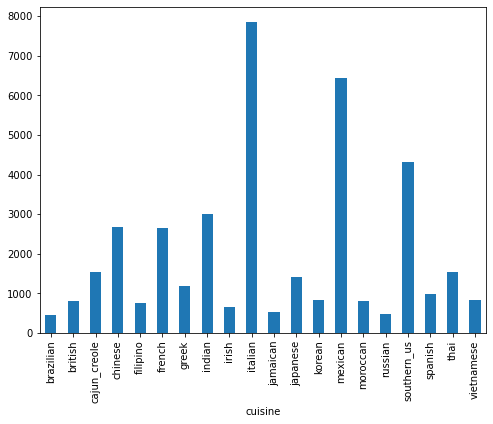

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('cuisine').ingredients.count().plot.bar(ylim=0)
plt.show()

# Imbalanced Cuisines

Number of ingredients per cuisine is imbalanced. Data is more biased towards Italian, Mexican and Southen_US

Minority classes may be treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.ingredients_text).toarray()
labels = df.cuisine_id
features.shape

(39774, 17721)

In [6]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2

for cuisine, cuisine_id in sorted(cuisine_to_id.items()):
  features_chi2 = chi2(features, labels == cuisine_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(cuisine))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'brazilian':
  . Most correlated unigrams:
. acai
. cachaca
  . Most correlated bigrams:
. sugar cachaca
. cachaca lime
# 'british':
  . Most correlated unigrams:
. suet
. stilton
  . Most correlated bigrams:
. stilton cheese
. beef drippings
# 'cajun_creole':
  . Most correlated unigrams:
. creole
. cajun
  . Most correlated bigrams:
. creole seasoning
. cajun seasoning
# 'chinese':
  . Most correlated unigrams:
. chinese
. soy
  . Most correlated bigrams:
. sesame oil
. soy sauce
# 'filipino':
  . Most correlated unigrams:
. lumpia
. calamansi
  . Most correlated bigrams:
. lumpia wrappers
. calamansi juice
# 'french':
  . Most correlated unigrams:
. yolks
. gruyere
  . Most correlated bigrams:
. large egg
. gruyere cheese
# 'greek':
  . Most correlated unigrams:
. crumbles
. feta
  . Most correlated bigrams:
. cheese crumbles
. feta cheese
# 'indian':
  . Most correlated unigrams:
. garam
. masala
  . Most correlated bigrams:
. ground turmeric
. garam masala
# 'irish':
  . Most co

Now, each of 39774 recipes is represented by 17818 features

__________________________________________________
<h1><center>TF-IDF explained</center></h1>

<center>messages = ["hey lets get lunch :)", 
            "Hey!!! I need a favor"]

|    . | favor | get | hey | lets | lunch | need |
|------|-------|-----|-----|------|-------|------|
|   0  | 0.000 |0.534|0.379| 0.534| 0.534 | 0.000|
|   1  | 0.631 |0.000|0.449| 0.000| 0.000 | 0.631|

<br>
<br>
<br>

<center>messages = ["hey hey hey lets get lunch :)", 
            "Hey!!! I need a favor"]

|    . | favor | get | hey | lets | lunch | need |
|------|-------|-----|-----|------|-------|------|
|   0  | 0.000 |0.363|0.776| 0.363| 0.363 | 0.000|
|   1  | 0.631 |0.000|0.449| 0.000| 0.000 | 0.631|

<br>
<br>
<br>

<center>messages = ["hey hey hey lets get lunch :)", 
            "I need a favor"]

|    . | favor | get | hey | lets | lunch | need |
|------|-------|-----|-----|------|-------|------|
|   0  | 0.000 |0.289|0.866| 0.289| 0.289 | 0.000|
|   1  | 0.707 |0.000|0.449| 0.000| 0.000 | 0.707|

__________________________________________________


In [7]:
df.head()

,cuisine,ingredients,cuisine_id,ingredients_text
0,greek,"[romaine lettuce, black olives, grape tomatoes...",0,"romaine lettuce, black olives, grape tomatoes,..."
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",1,"plain flour, ground pepper, salt, tomatoes, gr..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",2,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,indian,"[water, vegetable oil, wheat, salt]",3,"water, vegetable oil, wheat, salt"
4,indian,"[black pepper, shallots, cornflour, cayenne pe...",3,"black pepper, shallots, cornflour, cayenne pep..."


### Training using MultinomialNB model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB 

X_train, X_test, y_train, y_test = train_test_split(df['ingredients_text'], df['cuisine'], random_state = 0)

tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [9]:
def predictor(i):
    print("Ingredients are as follow:\n",X_test[i])
    print()
    print("Actual cuisine: ",y_test[i])
    print()
    print("Predicted cuisine: ",clf.predict(tfidf.transform([X_test[i]])))

In [10]:
predictor(21660)
print("_____________________________")
predictor(3281)
print("_____________________________")
predictor(3434)
print("_____________________________")
predictor(8834)
print("_____________________________")
predictor(1328)

Ingredients are as follow:
 kosher salt, vegetables, chinese chives, lo mein noodles, garlic, shiitake mushroom caps, light soy sauce, shaoxing wine, toasted sesame oil, dark soy sauce, white cabbage, ground white pepper

Actual cuisine:  chinese

Predicted cuisine:  ['chinese']
_____________________________
Ingredients are as follow:
 sweet potatoes, pumpkin pie spice, eggs, whipped topping, pie crust mix, mccormick pure vanilla extract, chopped pecans, cold water, salt, sweetened condensed milk

Actual cuisine:  southern_us

Predicted cuisine:  ['southern_us']
_____________________________
Ingredients are as follow:
 tomatoes, baby spinach, garlic cloves, grated romano cheese, extra virgin olive oil, ground black pepper, sea salt, grated parmesan cheese, gluten free pasta

Actual cuisine:  italian

Predicted cuisine:  ['italian']
_____________________________
Ingredients are as follow:
 green chile, pepper, boneless chicken breast, chili powder, reduced fat sour cream, red bell peppe

Not Bad! It seems the model is working. Given input of ingredients, the model is able to output a cuisine.

But is it really that accurate?

Let's compare the accuracy between MultinomialNB() and LinearSVC().

In [11]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    LinearSVC(),
    MultinomialNB()]
 
models_name = [
    "LinearSVC()",
    "MultinomialNB()"]

i = 0
for model in models:
    print(models_name[i], ":\t",cross_val_score(model, features, labels, scoring='accuracy', cv=5).mean())
    i += 1

LinearSVC() :	 0.7848595704369894
MultinomialNB() :	 0.636093998694884


The predictor() function, using MultinomialNB() may have showed that the model works but with just an accuracy of approximately 63%.

But we can do better with linearSVC() which has the accuract of 78%. 

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import seaborn as sns

model = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(df['ingredients_text'], df['cuisine'], random_state = 0)

tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
counts = [y_test.value_counts()[x] for x in range(len(cuisine_id_df.cuisine.values))]

model.fit(X_train_tfidf, y_train)
print("Linear SVC model Accuracy: ",model.score(X_test_tfidf, y_test))
y_pred = model.predict(X_test_tfidf)

Linear SVC model Accuracy:  0.7956556717618665


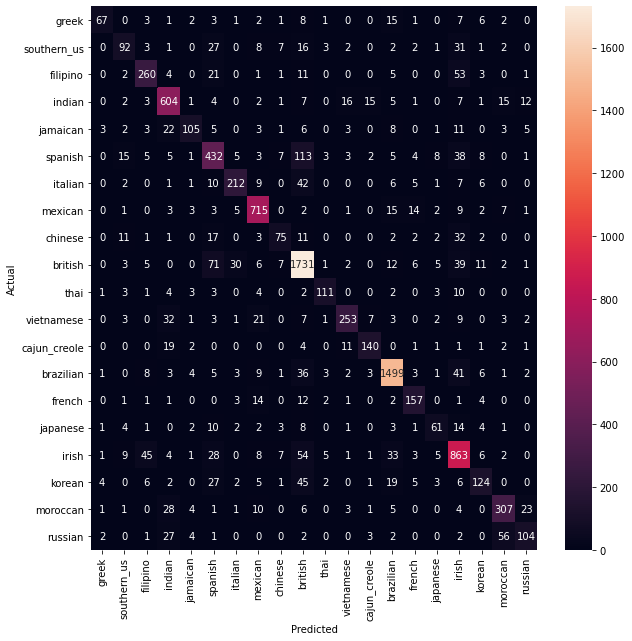

In [36]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=cuisine_id_df.cuisine.values, yticklabels=cuisine_id_df.cuisine.values)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Most of the predictions is on the diagonal (predicted cuisine = actual cuisine), where we want them to be. 

But there is a noticeable amount of misclassifications in the confusion matrix. 

Below will explain how to interpret this confusion matrix.

<h1><center>Confusion matrix explained</center></h1>

|    . | A | B | C | D |
|------|---|---|---|---|
|   A  | TP| X | X | X |
|   B  | X | TP| X | X |
|   C  | X | X | TP| X |
|   D  | X | X | X | TP|

<center>P illustrates the True Positives for all variables
    
<br>
<hr>


|    . | A | B | C | D |
|------|---|---|---|---|
|   A  | X | X | X | X |
|   B  | X | TN | TN | TN |
|   C  | X | TN | TN | TN |
|   D  | X | TN | TN | TN |

<center>P illustrates the True Negatives for variable A
    
<br>
<hr>


|    . | A | B | C | D |
|------|---|---|---|---|
|   A  | X | X | X | X |
|   B  | FP| X | X | X |
|   C  | FP| X | X | X |
|   D  | FP| X | X | X |

<center>P illustrates the False Positives for variable A
    
<br>
<hr>


|    . | A | B | C | D |
|------|---|---|---|---|
|   A  | X |FN | FN| FN|
|   B  | X | X | X | X |
|   C  | X | X | X | X |
|   D  | X | X | X | X |

<center>P illustrates the False Negative for variable A
    
<br>
<hr>



In [38]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['cuisine'].unique()))

              precision    recall  f1-score   support

       greek       0.83      0.56      0.67       120
 southern_us       0.61      0.46      0.53       198
    filipino       0.75      0.72      0.73       362
      indian       0.79      0.87      0.83       696
    jamaican       0.78      0.58      0.67       181
     spanish       0.64      0.66      0.65       658
     italian       0.80      0.70      0.75       302
     mexican       0.87      0.91      0.89       783
     chinese       0.67      0.47      0.55       159
     british       0.82      0.90      0.85      1932
        thai       0.84      0.76      0.80       147
  vietnamese       0.85      0.73      0.78       348
cajun_creole       0.81      0.77      0.79       183
   brazilian       0.91      0.92      0.92      1631
      french       0.77      0.79      0.78       199
    japanese       0.64      0.52      0.57       118
       irish       0.73      0.80      0.76      1076
      korean       0.67    

### Saving our model

In [48]:
import pickle
pickle.dump(model, open("model/cuisine_classification_model.pkl", "wb"))

### Saving tfidf

In [49]:
import pickle
pickle.dump(tfidf, open("model/tfidf.pkl", "wb"))

### Loading and running model

In [53]:
import pickle
model = pickle.load(open("model/cuisine_classification_model.pkl", "rb"))
tfidf = pickle.load(open("model/tfidf.pkl", "rb"))

In [54]:
def predictor(model, tfidf, text):
    print("query: ", text)
    result = model.predict(tfidf.transform([text]))
    print("Predicted cuisine: ", result[0])

In [56]:
text = 'sweet potatoes, pumpkin pie spice, eggs, whipped topping'
predictor(model, tfidf, text)

query:  sweet potatoes, pumpkin pie spice, eggs, whipped topping
Predicted cuisine:  southern_us
